<html>
<head>
<title>Page Title</title>
</head>
<body>

<h1>	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;Image Classification By Using CNN</h1>


</body>
</html>

<br>
<p style="font-size:30px">Main Objectives:</p> 
<br>

<p style="font-size:14px">
    This report focuses on using CNN algorithm to classify different images by using machine equipped by CPU processor.
<br>The aims of this report are:<br>
1-Classifing the images by using different sequential CNN models.<br>
2- Studying the effect of tuning different hyperparameter on models performance in order to determine which set of parameters have noticeable impact on model behavior.<br>
This report can benefit People who are interested in image classification domain as it an attempt to quantify the relationship between different sets of hyperparameters and models performance.</p>

<br>
<p style="font-size:30px">DataSet:</p> <br>

This dataset consists of 1125 outdoor colorful images for different weather conditions (Shine, Cloudy, Rain and sunrise), their size varies from one image to other and they are proper balanced meaning that number of images for different weather classes are somehow similar.


Dataset Attribute:
Image: numpy array (shape (250,250,3)
Class_des: object (values: Shine, Sunrise, Cloudy, Rain)
Class_id: integer (values:0,1,2,3)
Data comes in form of images file (JPG) and each image name represent the corresponding weather status (screenshot for images files) as part of data features engineering class description and class_id will be extracted.



<table style="width:40%">
  <tr>
    <th>Class Description </th>
    <th>Class_id</th>
  </tr>
  <tr>
    <td>Sunrise</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Shine</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Cloudy</td>
    <td>2</td>
  </tr>
  <tr>
    <td>Rain</td>
    <td>3</td>
  </tr>

</table>

<br>
<p style="font-size:30px">Data Processing:</p> <br>

In [ ]:
import pandas as pd
from PIL import Image
import pydicom as dicom
from skimage import exposure
from skimage.transform import resize
import os,cv,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import seaborn as sns

1-	Read the image file from image directory<br>
2-	Convert the image file to array<br>
3-	Resize the images to (250,250,3)<br>
4-	Extract the class description and class number for each image<br>


In [8]:
# This block of code will read the img and convert them to array of size of (250,250,3)
start_time = time.time()
data = []
for filename in os.listdir('Image_classification/dataset2/'):
    img = Image.open('Image_classification/dataset2/' + filename)
    img_array = np.array(img)
    img_comp = resize(img_array,(250,250,3))
    
    class_1 = lambda class_dsc,class_id:('sunrise',0) if 'sunrise' in filename else (('shine',1) if 'shine' in filename else ('cloudy',2) if 'cloudy' in filename else ('rain',3))
    
    data.append({ "img":img_comp,"class_des":class_1(filename,filename)[0],"class_id":class_1(filename,filename)[1]})
    
img_df = pd.DataFrame(data)
print('Excution time: ', time.time() - start_time)

Excution time:  78.27610731124878


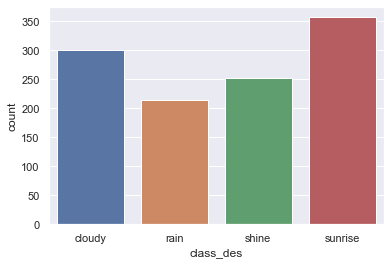

In [9]:
# ploting the numbers of images for each class
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=img_df.class_des, data=img_df)

5-	Rearrange randomly the samples to make sure samples are not ordered by class (When images are loaded from net they are sorted by name so either to resort them in the hosted directly by using other features (For example size), Or to resort them randomly by using np.random.shuffle() method.

In [ ]:
np.random.shuffle(data)
data

Ploting sample images

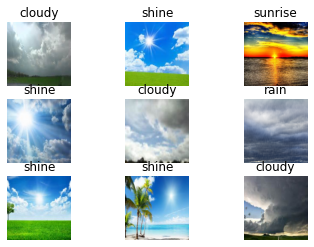

In [207]:
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(data[i]['img'])
    plt.axis("off")
    plt.title(data[i]['class_des'])

6-	Distribute the data between training and validation sets (900 samples have been dedicated for trainng and 225 for validation).

In [88]:
x_data = []
y_data = []
for i,item in enumerate(data):
    x_data.append(item['img'])
    y_data.append(item['class_id'])
    
x_data = np.array(x_data)
y_data = np.array(y_data)
x_train = x_data[:900]
y_train = y_data[:900]
x_test = x_data[900:]
y_test = y_data[900:]


7-	Convert classes to categorical  by using keras.utils.to_categorical() method.


In [90]:
num_classes = 4

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f'shape of x_train: {x_train.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of x_test: {x_test.shape}')
print(f'shape of y_test: {y_test.shape}')

shape of x_train: (900, 250, 250, 3)
shape of y_train: (900, 4)
shape of x_test: (225, 250, 250, 3)
shape of y_test: (225, 4)


In [93]:
x_train.shape[1:]

(250, 250, 3)

<br>
<p style="font-size:30px">Model Training</p> <br>
Different models have been created by tuning different hyperparameters like ( number of epochs, number of conv2d layers, type of activation function, type of optimizers, size of kernel..etc)

<b>First Model:</b>
This model served as a bassline for other models, it consists from (conv2d layers , relu activation function, RMSprop optimizer, kernel size of (5,5) , MaxPooling 2D size(2,2)


In [94]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 250 filters
model_1.add(Conv2D(250, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 250 filters
model_1.add(Conv2D(250, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 250
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x250 into 225000X1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 125, 250)     19000     
_________________________________________________________________
activation (Activation)      (None, 125, 125, 250)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 250)       1562750   
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 250)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 250)       0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 250)       0         
_________________________________________________________________
flatten (Flatten)            (None, 225000)            0

In [111]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model1_history = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
29/29 [==============================] - 246s 8s/step - loss: 0.7562 - accuracy: 0.7907 - val_loss: 0.9105 - val_accuracy: 0.8000
Epoch 2/10
29/29 [==============================] - 231s 8s/step - loss: 0.3413 - accuracy: 0.9215 - val_loss: 2.1445 - val_accuracy: 0.7644
Epoch 3/10
29/29 [==============================] - 229s 8s/step - loss: 0.2609 - accuracy: 0.9356 - val_loss: 2.2136 - val_accuracy: 0.7378
Epoch 4/10
29/29 [==============================] - 229s 8s/step - loss: 0.4036 - accuracy: 0.9109 - val_loss: 1.0382 - val_accuracy: 0.7511
Epoch 5/10
29/29 [==============================] - 227s 8s/step - loss: 0.2684 - accuracy: 0.9197 - val_loss: 0.7106 - val_accuracy: 0.8133
Epoch 6/10
29/29 [==============================] - 228s 8s/step - loss: 0.3096 - accuracy: 0.9105 - val_loss: 4.5119 - val_accuracy: 0.6133
Epoch 7/10
29/29 [==============================] - 227s 8s/step - loss: 0.5075 - accuracy: 0.8970 - val_loss: 0.9839 - val_accuracy: 0.8178
Epoch 8/10
29

<b>Second Model</b>
One more conv2D layer has been added to first model


In [188]:
# adding one more layer (model_1 + one more Conv2D layer)
model_2 = Sequential()


## 5x5 convolution with 2x2 stride and 250 filters
model_2.add(Conv2D(250, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 250 filters
model_2.add(Conv2D(250, (5, 5), strides = (2,2)))
model_2.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 250 filters
model_2.add(Conv2D(250, (5, 5), strides = (2,2)))
model_2.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 250
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Flatten turns 3x3x250 into 49000
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 125, 125, 250)     19000     
_________________________________________________________________
activation_4 (Activation)    (None, 125, 125, 250)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 250)       1562750   
_________________________________________________________________
activation_5 (Activation)    (None, 61, 61, 250)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 250)       1562750   
_________________________________________________________________
activation_6 (Activation)    (None, 29, 29, 250)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 250)      

In [189]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model2_hist = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
29/29 [==============================] - 233s 8s/step - loss: 11.3211 - accuracy: 0.3322 - val_loss: 1.0763 - val_accuracy: 0.4800
Epoch 2/10
29/29 [==============================] - 231s 8s/step - loss: 0.8418 - accuracy: 0.6099 - val_loss: 0.9601 - val_accuracy: 0.7067
Epoch 3/10
29/29 [==============================] - 229s 8s/step - loss: 1.0245 - accuracy: 0.6430 - val_loss: 0.8652 - val_accuracy: 0.7111
Epoch 4/10
29/29 [==============================] - 230s 8s/step - loss: 0.6861 - accuracy: 0.7279 - val_loss: 1.3490 - val_accuracy: 0.5911
Epoch 5/10
29/29 [==============================] - 230s 8s/step - loss: 0.7324 - accuracy: 0.7165 - val_loss: 0.8458 - val_accuracy: 0.6844
Epoch 6/10
29/29 [==============================] - 228s 8s/step - loss: 1.4507 - accuracy: 0.7242 - val_loss: 0.6365 - val_accuracy: 0.7644
Epoch 7/10
29/29 [==============================] - 228s 8s/step - loss: 0.5486 - accuracy: 0.7961 - val_loss: 6.1517 - val_accuracy: 0.3511
Epoch 8/10
2

<b>Third Model:</b>
Changing the activation function in model_1 to leaky Relu


In [219]:
# Changing the activation function in model_1 to leaky Relu


model_3 = Sequential()


## 5x5 convolution with 2x2 stride and 250 filters
model_3.add(Conv2D(250, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_3.add(LeakyReLU(alpha=0.1))


## Another 5x5 convolution with 2x2 stride and 250 filters
model_3.add(Conv2D(250, (5, 5), strides = (2,2)))
model_3.add(LeakyReLU(alpha=0.1))



## 2x2 max pooling reduces to 3 x 3 x 250
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

## Flatten turns 3x3x250 into 225000
model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 125, 125, 250)     19000     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 125, 125, 250)     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 61, 250)       1562750   
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 61, 61, 250)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 250)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 250)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 225000)           

In [220]:
# Run it for 7 epochs
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model3_hist = model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=7,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/7
29/29 [==============================] - 385s 12s/step - loss: 50.0110 - accuracy: 0.3928 - val_loss: 0.7930 - val_accuracy: 0.6178
Epoch 2/7
29/29 [==============================] - 248s 9s/step - loss: 1.0182 - accuracy: 0.6584 - val_loss: 1.3727 - val_accuracy: 0.4267
Epoch 3/7
29/29 [==============================] - 261s 9s/step - loss: 0.9703 - accuracy: 0.6227 - val_loss: 21.8665 - val_accuracy: 0.3333
Epoch 4/7
29/29 [==============================] - 257s 9s/step - loss: 4.8439 - accuracy: 0.5899 - val_loss: 0.7514 - val_accuracy: 0.7111
Epoch 5/7
29/29 [==============================] - 250s 9s/step - loss: 0.8546 - accuracy: 0.7521 - val_loss: 0.6589 - val_accuracy: 0.7511
Epoch 6/7
29/29 [==============================] - 251s 9s/step - loss: 0.7860 - accuracy: 0.7115 - val_loss: 0.6913 - val_accuracy: 0.7422
Epoch 7/7
29/29 [==============================] - 252s 9s/step - loss: 1.1026 - accuracy: 0.7298 - val_loss: 0.6816 - val_accuracy: 0.7333


<b>Fourth model:</b>
Reducing the kernal size to (3,3)


In [222]:
# Reducing the kernal size to (3,3)
model_4 = Sequential()


## 5x5 convolution with 2x2 stride and 250 filters
model_4.add(Conv2D(250, (3, 3), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_4.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 250 filters
model_4.add(Conv2D(250, (3, 3), strides = (2,2)))
model_4.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 250
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

## Flatten turns 3x3x250 into 240250X1
model_4.add(Flatten())
model_4.add(Dense(512))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 125, 125, 250)     7000      
_________________________________________________________________
activation_12 (Activation)   (None, 125, 125, 250)     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 62, 62, 250)       562750    
_________________________________________________________________
activation_13 (Activation)   (None, 62, 62, 250)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 250)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 31, 31, 250)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 240250)           

In [223]:
# Run it for 7 epochs
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model4_history = model_4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/7
29/29 [==============================] - 193s 6s/step - loss: 9.2820 - accuracy: 0.4740 - val_loss: 0.8474 - val_accuracy: 0.6222
Epoch 2/7
29/29 [==============================] - 136s 5s/step - loss: 0.7560 - accuracy: 0.7365 - val_loss: 0.9190 - val_accuracy: 0.6889
Epoch 3/7
29/29 [==============================] - 134s 5s/step - loss: 0.6393 - accuracy: 0.7837 - val_loss: 0.4907 - val_accuracy: 0.8133
Epoch 4/7
29/29 [==============================] - 137s 5s/step - loss: 0.8596 - accuracy: 0.7911 - val_loss: 0.6995 - val_accuracy: 0.7644
Epoch 5/7
29/29 [==============================] - 135s 5s/step - loss: 0.5143 - accuracy: 0.8286 - val_loss: 0.6922 - val_accuracy: 0.7689
Epoch 6/7
29/29 [==============================] - 134s 5s/step - loss: 0.4784 - accuracy: 0.8491 - val_loss: 0.7874 - val_accuracy: 0.7956
Epoch 7/7
29/29 [==============================] - 135s 5s/step - loss: 0.3523 - accuracy: 0.8734 - val_loss: 0.4836 - val_accuracy: 0.8578


<b>Fifth Model:</b>
Since we achived good enhacenent in model number 4 we have decided to keep model  4 and change its optimizer to Adam.


In [224]:
# Using Adam optimizer instead of RMSprop
model_5 = Sequential()


## 5x5 convolution with 2x2 stride and 250 filters
model_5.add(Conv2D(250, (3, 3), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_5.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 250 filters
model_5.add(Conv2D(250, (3, 3), strides = (2,2)))
model_5.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 250
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))

## Flatten turns 3x3x250 into 240250X1
model_5.add(Flatten())
model_5.add(Dense(512))
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))
model_5.add(Dense(num_classes))
model_5.add(Activation('softmax'))

model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 125, 125, 250)     7000      
_________________________________________________________________
activation_16 (Activation)   (None, 125, 125, 250)     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 62, 62, 250)       562750    
_________________________________________________________________
activation_17 (Activation)   (None, 62, 62, 250)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 250)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 31, 31, 250)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 240250)           

In [229]:
# Run it for 10 epochs
batch_size = 32

# initiate Adam optimizer
opt = keras.optimizers.Adam(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_5.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model5_history = model_5.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
29/29 [==============================] - 277s 6s/step - loss: 0.2633 - accuracy: 0.8965 - val_loss: 0.5069 - val_accuracy: 0.8400
Epoch 2/15
29/29 [==============================] - 119s 4s/step - loss: 0.1607 - accuracy: 0.9348 - val_loss: 0.4417 - val_accuracy: 0.8667
Epoch 3/15
29/29 [==============================] - 116s 4s/step - loss: 0.1007 - accuracy: 0.9672 - val_loss: 0.5367 - val_accuracy: 0.8311
Epoch 4/15
29/29 [==============================] - 120s 4s/step - loss: 0.1643 - accuracy: 0.9523 - val_loss: 0.4887 - val_accuracy: 0.8756
Epoch 5/15
29/29 [==============================] - 117s 4s/step - loss: 0.0790 - accuracy: 0.9803 - val_loss: 0.5554 - val_accuracy: 0.8444
Epoch 6/15
29/29 [==============================] - 123s 4s/step - loss: 0.0808 - accuracy: 0.9697 - val_loss: 0.4399 - val_accuracy: 0.8489
Epoch 7/15
29/29 [==============================] - 120s 4s/step - loss: 0.5579 - accuracy: 0.8277 - val_loss: 0.5532 - val_accuracy: 0.8622
Epoch 8/15
29

In [230]:
yhat_model5 = model_5.predict_classes(x_test)

C:\Users\Windows10-Desktop\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [231]:
yhat_model5_prob = model_5.predict(x_test)

Ploting some images from validations dataset shwing true class Vs predicted class

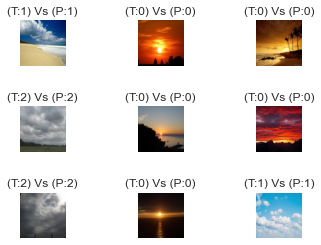

In [232]:
for i in range(9):
    ax = plt.subplot(3, 3,i + 1)
    plt.subplots_adjust(hspace=0.9)
    plt.imshow(x_test[i])
    title = f'(T:{np.argmax(y_test[i])})' + ' Vs ' + f'(P:{yhat_model5[i]})'
    plt.title(title)
    plt.axis('off')

<br>
<p style="font-size:30px">Selection Model</p> <br>

1-The best accuracy achieved by first model is 81,78% at epoch 7 <br>
2-The best accuracy achieved by second model is 80.44% at epoch 9<br>
3-The best accuracy achieved by third model is 75.11% at epoch 5<br>
4-The best accuracy achieved by fourth model is 85.78% at epoch 7 (it was run for only 7 epochs)<br>
5-The best accuracy achieved by fifth model is 90.22% at epoch 10 <br><br>
Model number 5 has been selected because its accuracy is the highest one, we reached to approximately 91% score by using this model and its execution time was in average, below figure illustrates the performance of model’s vs number of epochs, Its Cleary noticeable that model 5 (green ones) is the best one as shown in below chart

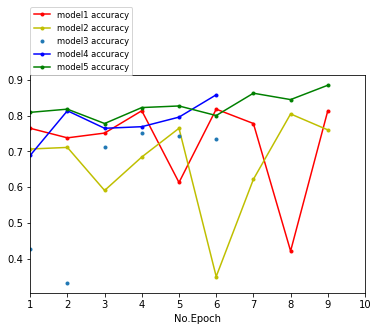

In [226]:
fig, ax = plt.subplots()
ax.plot(model1_history.history["val_accuracy"],'r', marker='.', label="model1 accuracy")
ax.plot(model2_hist.history["val_accuracy"],'y', marker='.', label="model2 accuracy")
ax.plot(model3_hist.history["val_accuracy"],'o', marker='.', label="model3 accuracy")
ax.plot(model4_history.history["val_accuracy"],'b', marker='.', label="model4 accuracy")
ax.plot(model5_history.history["val_accuracy"],'g', marker='.', label="model5 accuracy")
#ax.plot(model2_hist.history["loss"],'g', marker='.', label="Train loss")
#ax.plot(model1_history.history["val_loss"],'y', marker='.', label="Validation loss")
ax.set_xlabel('No.Epoch')
ax.set_xlim(1,10)
ax.set_title('Model Acuracy Vs No.epochs')
ax.legend(fontsize='small',loc=(0,1))

<br>
<p style="font-size:30px">Key Findings</p> <br>
1-	Increases the number of layers impact badly the performance of model.<br>
2-	Running the models for high number of epochs does not leverage model performance, in contrast it impacts badly its performance.<br>
3-	Using leaky Relu activation function instead of Relu has impacted badly model performance.<br>
4-	Adam optimizer has shown significant distribution toward model performance.<br>
5-	Reducing Kernal size has shown significant distribution toward model performance.<br>


<br>
<p style="font-size:30px">Suggestions</p> <br>
1-	Reconducting this study by using more variety and number of images.<br>
2-	Using Function type model to evaluate its performance and weather significant achievement can be gained.<br>
3-	Using GPU instead of CPU to leverage machine hardware capabilities.<br>
4-	Experience different models from Pytorch.<br>
5-	Working in building classification image models which covers high number of objects.<br>
